# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, multilabel_confusion_matrix
from sklearn.utils.class_weight import compute_class_weight


# Impor Dataset

In [ ]:
# Mengimpor dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'
data = pd.read_csv(url)

# Menampilkan beberapa baris pertama data
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# Eksplorasi Data dan Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

# Feature Engineering

In [ ]:
# Memisahkan fitur dan target
X = data.drop(['UDI', 'Product ID', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Machine failure'], axis=1)
y = data['Machine failure']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create Model

In [ ]:
# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membangun model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

# Model Training and Evaluations

In [ ]:
# Membuat prediksi
y_pred = model.predict(X_test_scaled)

# Mengevaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[1930    9]
 [  25   36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.80      0.59      0.68        61

    accuracy                           0.98      2000
   macro avg       0.89      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000


Accuracy Score:
0.983


# Predictions

In [ ]:
# Membuat DataFrame dari nilai prediksi dan nilai aktual
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Menampilkan beberapa baris pertama dari DataFrame prediksi
print(predictions.head(10))

# Menggabungkan dengan fitur lain untuk analisis lebih lanjut
results = X_test.copy()
results['Actual'] = y_test
results['Predicted'] = y_pred

# Menampilkan beberapa baris pertama dari DataFrame hasil
print(results.head(10))


      Actual  Predicted
6252       0          0
4684       1          0
1731       0          0
4742       0          0
4521       0          0
6340       1          0
576        0          0
5202       0          0
6363       0          0
439        0          0
      Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
6252                300.8                    310.3                    1538   
4684                303.6                    311.8                    1421   
1731                298.3                    307.9                    1485   
4742                303.3                    311.3                    1592   
4521                302.4                    310.4                    1865   
6340                300.5                    309.9                    1397   
576                 297.7                    309.7                    1440   
5202                303.7                    312.7                    1335   
6363                300.0         

In [ ]:
# Menggabungkan dengan fitur lain untuk analisis lebih lanjut
results = X_test.copy()
results['Actual'] = y_test
results['Predicted'] = y_pred

# Menyimpan hasil ke file CSV
results.to_csv('prediction_results.csv', index=False)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Menghitung confusion matrix
conf_matrix = confusion_matrix(results['Actual'], results['Predicted'])
tn, fp, fn, tp = conf_matrix.ravel()

# Menghitung akurasi
accuracy = accuracy_score(results['Actual'], results['Predicted']) * 100

# Menampilkan confusion matrix dan akurasi
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"\nTrue Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"\nAccuracy Of Prediction = ({tn} + {tp}) / ({tn} + {fp} + {fn} + {tp}) x 100%")
print(f"= {accuracy:.2f}%")


Confusion Matrix:
[[1930    9]
 [  25   36]]

True Negatives (TN): 1930
False Positives (FP): 9
False Negatives (FN): 25
True Positives (TP): 36

Accuracy Of Prediction = (1930 + 36) / (1930 + 9 + 25 + 36) x 100%
= 98.30%


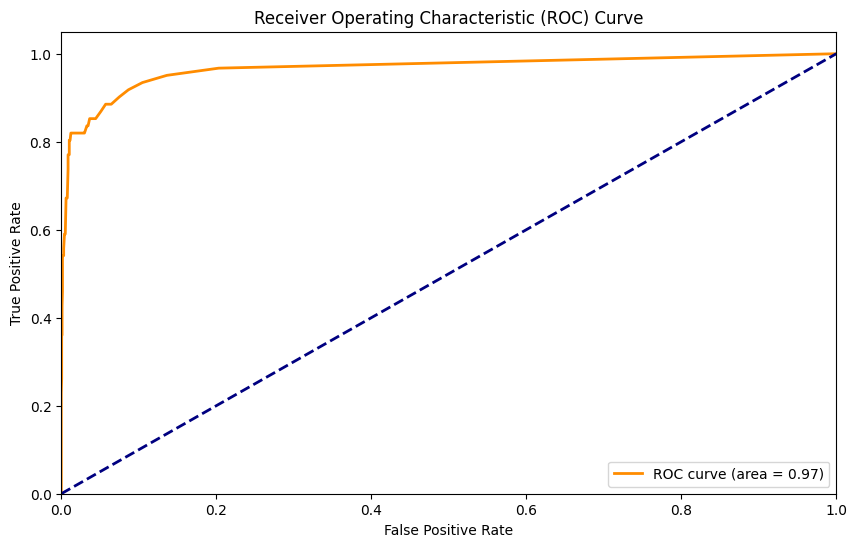

In [ ]:
# Menghitung probabilitas prediksi untuk ROC Curve
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Menghitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Menghitung AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()